# 1.MORO OPTIMIZATION

# 1.1 Generate random policies

In [1]:
import functools
import pandas as pd
import numpy as np
from ema_workbench import save_results
from ema_workbench.util.utilities import load_results

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'

A1_Total_Costs = functools.partial(robustness, SMALLER, 150000000)
A2_Total_Costs = functools.partial(robustness, SMALLER, 150000000)
A3_Total_Costs = functools.partial(robustness, SMALLER, 150000000)
A4_Total_Costs = functools.partial(robustness, SMALLER, 150000000)
A5_Total_Costs = functools.partial(robustness, SMALLER, 150000000)
A1_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A2_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A3_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A4_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A5_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
RfR_Total_Costs = functools.partial(robustness, SMALLER, 1250000000)
Expected_Evacuation_Costs = functools.partial(robustness, SMALLER, 500000)

In [2]:
from problem_formulation import get_model_for_problem_formulation

model, _ = get_model_for_problem_formulation(3)

In [3]:
from ema_workbench import ema_logging, MultiprocessingEvaluator, Samplers

ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50,              
                                            policies=4,
                                            uncertainty_sampling=Samplers.MC)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 50 scenarios * 4 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [05:21<00:00,  1.61s/it]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


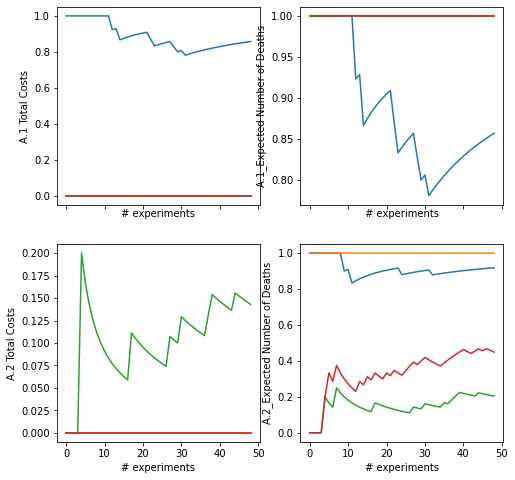

In [4]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,8),
                        sharex=True)
axes = [axes[0,0],axes[0,1],axes[1,0],axes[1,1]]                             #axes[1,1]

robustness_funcs = {"A.1 Total Costs": A1_Total_Costs,
                    "A.2 Total Costs": A2_Total_Costs,
                    "A.3 Total Costs": A3_Total_Costs,
                    "A.4 Total Costs": A4_Total_Costs,
                    "A.5 Total Costs": A5_Total_Costs,
                    "A.1_Expected Number of Deaths": A1_Expected_Number_of_Deaths,
                    "A.2_Expected Number of Deaths": A2_Expected_Number_of_Deaths,
                    "A.3_Expected Number of Deaths": A3_Expected_Number_of_Deaths,
                    "A.4_Expected Number of Deaths": A4_Expected_Number_of_Deaths,
                    "A.5_Expected Number of Deaths": A5_Expected_Number_of_Deaths,
                    "RfR Total Costs": RfR_Total_Costs,
                    "Expected Evacuation Costs": Expected_Evacuation_Costs}

experiments, outcomes = results

for ax, (outcome, value) in zip(axes, outcomes.items()):
    for policy in np.unique(experiments['policy']):
        logical = experiments['policy'] == policy
        data = value[logical]
        
        robustness = []
      
        for i in range(1, data.shape[0]):
            robustness.append(robustness_funcs[outcome](data[0:i]))
        ax.plot(robustness, label=policy)   #potentieel policies verhogen naar 12 zodat je 12 polts krijgt???
    ax.set_xlabel("# experiments")
    ax.set_ylabel(outcome)

# 1.2 Search for candidate solutions



In [5]:
from ema_workbench.em_framework import sample_uncertainties
n_scenarios = 5
scenarios = sample_uncertainties(model, n_scenarios)
nfe = int(100)

In [6]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)


In [7]:
#Not sure if we need this cell
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'

A1_Total_Costs = functools.partial(robustness, SMALLER, 150000000)
A2_Total_Costs = functools.partial(robustness, SMALLER, 150000000)
A3_Total_Costs = functools.partial(robustness, SMALLER, 150000000)
A4_Total_Costs = functools.partial(robustness, SMALLER, 150000000)
A5_Total_Costs = functools.partial(robustness, SMALLER, 150000000)
A1_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A2_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A3_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A4_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A5_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
RfR_Total_Costs = functools.partial(robustness, SMALLER, 1250000000)
Expected_Evacuation_Costs = functools.partial(robustness, SMALLER, 500000)

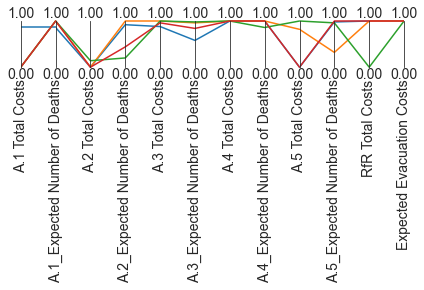

In [8]:
from ema_workbench.analysis import parcoords

experiments, outcomes = results

funcs = {'A.1 Total Costs': A1_Total_Costs,
         'A.2 Total Costs': A2_Total_Costs,
         'A.3 Total Costs': A3_Total_Costs,
         'A.4 Total Costs': A4_Total_Costs,
         'A.5 Total Costs': A5_Total_Costs,
         'A.1_Expected Number of Deaths': A1_Expected_Number_of_Deaths,
         'A.2_Expected Number of Deaths': A2_Expected_Number_of_Deaths,
         'A.3_Expected Number of Deaths': A3_Expected_Number_of_Deaths,
         'A.4_Expected Number of Deaths': A4_Expected_Number_of_Deaths,
         'A.5_Expected Number of Deaths': A5_Expected_Number_of_Deaths,
         'RfR Total Costs': RfR_Total_Costs,
         'Expected Evacuation Costs': Expected_Evacuation_Costs}

total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in outcomes.items()}
    
    for k, v in temp_outcomes.items():
        score = funcs[k](v)
        scores[k] = score
    total_scores[policy] = scores

data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

In [9]:
from ema_workbench.em_framework.optimization import EpsilonProgress

convergence = [EpsilonProgress()]


MAXIMIZE = ScalarOutcome.MAXIMIZE
MINIMIZE = ScalarOutcome.MINIMIZE

funcs = {'A.1 Total Costs': A1_Total_Costs,
         'A.2 Total Costs': A2_Total_Costs,
         'A.3 Total Costs': A3_Total_Costs,
         'A.4 Total Costs': A4_Total_Costs,
         'A.5 Total Costs': A5_Total_Costs,
         'A.1_Expected Number of Deaths': A1_Expected_Number_of_Deaths,
         'A.2_Expected Number of Deaths': A2_Expected_Number_of_Deaths,
         'A.3_Expected Number of Deaths': A3_Expected_Number_of_Deaths,
         'A.4_Expected Number of Deaths': A4_Expected_Number_of_Deaths,
         'A.5_Expected Number of Deaths': A5_Expected_Number_of_Deaths,
         'RfR Total Costs': RfR_Total_Costs,
         'Expected Evacuation Costs': Expected_Evacuation_Costs}

#Our robustness metric is calculating the fraction of the cases that is below our threshold. 
#We want to maximize this fraction since we want as many cases below the threshold as possible
robustnes_functions = [ScalarOutcome('A.1 Total Costs', kind = MAXIMIZE,
                                    function = A1_Total_Costs),
                       ScalarOutcome('A.2 Total Costs', kind = MAXIMIZE,
                                    function = A2_Total_Costs),
                       ScalarOutcome('A.3 Total Costs', kind = MAXIMIZE,
                                    function = A3_Total_Costs),
                       ScalarOutcome('A.4 Total Costs', kind = MAXIMIZE,
                                    function = A4_Total_Costs),
                       ScalarOutcome('A.5 Total Costs', kind = MAXIMIZE,
                                    function = A5_Total_Costs),
                       ScalarOutcome('A.1_Expected Number of Deaths', kind = MAXIMIZE,
                                    function = A1_Expected_Number_of_Deaths),
                       ScalarOutcome('A.2_Expected Number of Deaths', kind = MAXIMIZE,
                                    function = A2_Expected_Number_of_Deaths),
                       ScalarOutcome('A.3_Expected Number of Deaths', kind = MAXIMIZE,
                                    function = A3_Expected_Number_of_Deaths),
                       ScalarOutcome('A.4_Expected Number of Deaths', kind = MAXIMIZE,
                                    function = A4_Expected_Number_of_Deaths),
                       ScalarOutcome('A.5_Expected Number of Deaths', kind = MAXIMIZE,
                                    function = A5_Expected_Number_of_Deaths),
                       ScalarOutcome('RfR Total Costs', kind = MAXIMIZE,
                                    function = RfR_Total_Costs),
                       ScalarOutcome('Expected Evacuation Costs', kind = MAXIMIZE,
                                    function = Expected_Evacuation_Costs),
                      ]

epsilons=[0.05,]*len(funcs)  #final value of epsilon should be much lower.Just for experiment purposes is 1
nfe = 100
with MultiprocessingEvaluator(model) as evaluator:
    archive, convergence = evaluator.robust_optimize(robustnes_functions, scenarios,nfe=nfe,
                                                     convergence=convergence, epsilons=epsilons)

[MainProcess/INFO] pool started with 4 workers
100%|████████████████████████████████████████| 100/100 [12:35<00:00,  7.56s/it]
[MainProcess/INFO] optimization completed, found 9 solutions
[MainProcess/INFO] terminating pool


In [11]:
save_results((archive, convergence), 'opt system nfe {}.tar.gz'.format(nfe))

KeyError: 'epsilon_progress'

In [12]:
len(archive)

9

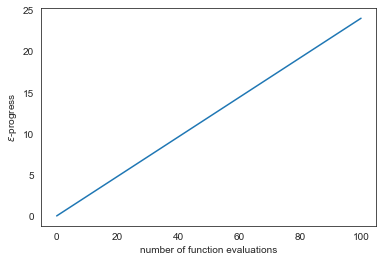

In [13]:
fig, ax = plt.subplots()
ax.plot(convergence.nfe, convergence.epsilon_progress)
ax.set_ylabel('$\epsilon$-progress')

ax.set_xlabel('number of function evaluations')
plt.show()

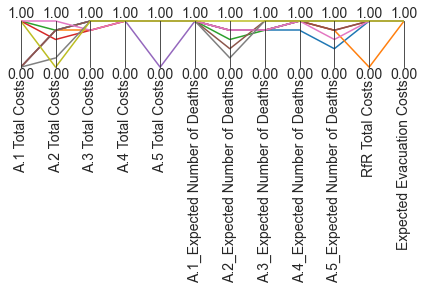

In [14]:
from ema_workbench.analysis import parcoords

data = archive.loc[:, [o.name for o in robustnes_functions]]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

In [ ]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

def costs(data):
    return data[0]/1e9 # makes numbers nicer
    
SMALLER = 'SMALLER'
"""
Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 1e-5) #not ok
Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1e4) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Total_Investment_Costs = costs
"""
A1_Total_Costs = costs #functools.partial(robustness, SMALLER, 150000000)
A2_Total_Costs = costs #functools.partial(robustness, SMALLER, 150000000)
A3_Total_Costs = costs #functools.partial(robustness, SMALLER, 150000000)
A4_Total_Costs = costs #functools.partial(robustness, SMALLER, 150000000)
A5_Total_Costs = costs #functools.partial(robustness, SMALLER, 150000000)
A1_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A2_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A3_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A4_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A5_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
RfR_Total_Costs = costs #functools.partial(robustness, SMALLER, 150000000)
Expected_Evacuation_Costs = costs #functools.partial(robustness, SMALLER, 150000000)


In [15]:
total = archive, convergence
save_results(total, './dataruns/MOROpf3Fractionsonly')

KeyError: 'epsilon_progress'

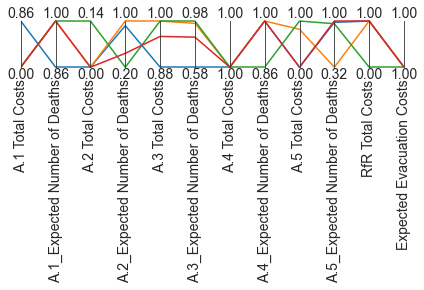

In [16]:
from ema_workbench.analysis import parcoords

experiments, outcomes = results

funcs = {'A.1 Total Costs': A1_Total_Costs,
         'A.2 Total Costs': A2_Total_Costs,
         'A.3 Total Costs': A3_Total_Costs,
         'A.4 Total Costs': A4_Total_Costs,
         'A.5 Total Costs': A5_Total_Costs,
         'A.1_Expected Number of Deaths': A1_Expected_Number_of_Deaths,
         'A.2_Expected Number of Deaths': A2_Expected_Number_of_Deaths,
         'A.3_Expected Number of Deaths': A3_Expected_Number_of_Deaths,
         'A.4_Expected Number of Deaths': A4_Expected_Number_of_Deaths,
         'A.5_Expected Number of Deaths': A5_Expected_Number_of_Deaths,
         'RfR Total Costs': RfR_Total_Costs,
         'Expected Evacuation Costs': Expected_Evacuation_Costs}

total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in outcomes.items()}
    
    for k, v in temp_outcomes.items():
        score = funcs[k](v)
        scores[k] = score
    total_scores[policy] = scores

data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

In [17]:
MAXIMIZE = ScalarOutcome.MAXIMIZE
MINIMIZE = ScalarOutcome.MINIMIZE

funcs = {'A.1 Total Costs': A1_Total_Costs,
         'A.2 Total Costs': A2_Total_Costs,
         'A.3 Total Costs': A3_Total_Costs,
         'A.4 Total Costs': A4_Total_Costs,
         'A.5 Total Costs': A5_Total_Costs,
         'A.1_Expected Number of Deaths': A1_Expected_Number_of_Deaths,
         'A.2_Expected Number of Deaths': A2_Expected_Number_of_Deaths,
         'A.3_Expected Number of Deaths': A3_Expected_Number_of_Deaths,
         'A.4_Expected Number of Deaths': A4_Expected_Number_of_Deaths,
         'A.5_Expected Number of Deaths': A5_Expected_Number_of_Deaths,
         'RfR Total Costs': RfR_Total_Costs,
         'Expected Evacuation Costs': Expected_Evacuation_Costs}

#For the costs, we look at the raw costs now, so we want to minimize those.
robustnes_functions = [ScalarOutcome('A.1 Total Costs', kind = MINIMIZE,
                                    function = A1_Total_Costs),
                       ScalarOutcome('A.2 Total Costs', kind = MINIMIZE,
                                    function = A2_Total_Costs),
                       ScalarOutcome('A.3 Total Costs', kind = MINIMIZE,
                                    function = A3_Total_Costs),
                       ScalarOutcome('A.4 Total Costs', kind = MINIMIZE,
                                    function = A4_Total_Costs),
                       ScalarOutcome('A.5 Total Costs', kind = MINIMIZE,
                                    function = A5_Total_Costs),
                       ScalarOutcome('A.1_Expected Number of Deaths', kind = MAXIMIZE,
                                    function = A1_Expected_Number_of_Deaths),
                       ScalarOutcome('A.2_Expected Number of Deaths', kind = MAXIMIZE,
                                    function = A2_Expected_Number_of_Deaths),
                       ScalarOutcome('A.3_Expected Number of Deaths', kind = MAXIMIZE,
                                    function = A3_Expected_Number_of_Deaths),
                       ScalarOutcome('A.4_Expected Number of Deaths', kind = MAXIMIZE,
                                    function = A4_Expected_Number_of_Deaths),
                       ScalarOutcome('A.5_Expected Number of Deaths', kind = MAXIMIZE,
                                    function = A5_Expected_Number_of_Deaths),
                       ScalarOutcome('RfR Total Costs', kind = MINIMIZE,
                                    function = RfR_Total_Costs),
                       ScalarOutcome('Expected Evacuation Costs', kind = MINIMIZE,
                                    function = Expected_Evacuation_Costs),
                      ]

"""
funcs = {'Expected Number of Deaths':Expected_Number_of_Deaths,
         'Expected Annual Damage': Expected_Annual_Damage,
         'Total Investment Costs': Total_Investment_Costs}

robustnes_functions = [ScalarOutcome('fraction EA deaths', kind=MAXIMIZE, 
                             variable_name='Expected Number of Deaths', function=Expected_Number_of_Deaths),
                       ScalarOutcome('fraction EA damage', kind=MAXIMIZE, 
                             variable_name='Expected Annual Damage', function=Expected_Annual_Damage),
                       ScalarOutcome('investment costs', kind=MINIMIZE, # note that we have to minimize costs!
                             variable_name='Total Investment Costs', function=Total_Investment_Costs)]
"""

"\nfuncs = {'Expected Number of Deaths':Expected_Number_of_Deaths,\n         'Expected Annual Damage': Expected_Annual_Damage,\n         'Total Investment Costs': Total_Investment_Costs}\n\nrobustnes_functions = [ScalarOutcome('fraction EA deaths', kind=MAXIMIZE, \n                             variable_name='Expected Number of Deaths', function=Expected_Number_of_Deaths),\n                       ScalarOutcome('fraction EA damage', kind=MAXIMIZE, \n                             variable_name='Expected Annual Damage', function=Expected_Annual_Damage),\n                       ScalarOutcome('investment costs', kind=MINIMIZE, # note that we have to minimize costs!\n                             variable_name='Total Investment Costs', function=Total_Investment_Costs)]\n"

In [18]:
# we have to change the plausible max for total investment costs
convergence = [EpsilonProgress()]

epsilons=[0.05,]*len(robustnes_functions)  #final value of epsilon should be much lower.Just for experiment purposes is 1
with MultiprocessingEvaluator(model) as evaluator:
    archive, convergence = evaluator.robust_optimize(robustnes_functions, scenarios, nfe=nfe,
                                                     convergence=convergence, epsilons=epsilons)

[MainProcess/INFO] pool started with 4 workers
100%|████████████████████████████████████████| 100/100 [14:42<00:00,  8.83s/it]
[MainProcess/INFO] optimization completed, found 9 solutions
[MainProcess/INFO] terminating pool


In [19]:
total2 = archive, convergence
save_results(total2, './dataruns/MOROpf3')

KeyError: 'epsilon_progress'

In [ ]:
len(archive)

In [ ]:
#Evaluate the convergence
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(convergence.nfe, convergence.epsilon_progress)
ax.set_ylabel('$\epsilon$-progress')

ax.set_xlabel('number of function evaluations')
plt.show()



In [21]:
print(len(archive))

9


# Re-evaluate candidate solutions under uncertainty

In [ ]:
from ema_workbench import Policy

policies = archive.drop([o.name for o in robustnes_functions], axis=1)
policies_to_evaluate = []

for i, policy in policies.iterrows():
    policies_to_evaluate.append(Policy("moro {}".format(i), **policy.to_dict()))

In [ ]:
n_scenarios = 1000
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies_to_evaluate)

In [ ]:
experiments, outcomes = results

overall_robustness = {}
for policy in np.unique(experiments['policy']):
    policy_robustness = {}

    logical = experiments['policy'] == policy
    
    for outcome, values in outcomes.items():
        values = values[logical]
        policy_robustness[outcome] = robustness_funcs[outcome](values)
    overall_robustness[policy] = policy_robustness
overall_robustness = pd.DataFrame.from_dict(overall_robustness).T
overall_robustness

In [ ]:
from ema_workbench.analysis import prim

data = outcomes['A.1_Expected Number of Deaths'] #we still need to decide on this

y = data > np.percentile(data, 10)

prim_alg = prim.Prim(experiments,y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

In [ ]:
box1.show_tradeoff()
plt.show()

In [ ]:
box1.inspect(style='graph')
plt.show()

In [ ]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(experiments, y)
plt.show()